# Data Preprocessing

In [ ]:
import pandas as pd
import re

file_path = 'QA_data1.csv'
df = pd.read_csv(file_path)

# Step 1: Drop rows with missing values in either 'Question' or 'Answer'
df.dropna(subset=['Question', 'Answer'], inplace=True)
print("\nDataset after dropping missing values:")
print(df.head())

# Step 2: Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\nDataset after removing duplicates:")
print(df.head())

# Step 3: Clean text by removing extra whitespace, converting to lowercase, and removing unwanted characters
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s\.\,\?\!]', '', text)
    return text

# Apply text cleaning on both 'Question' and 'Answer'
df['Question'] = df['Question'].apply(clean_text)
df['Answer'] = df['Answer'].apply(clean_text)

print("\nDataset after text cleaning:")
print(df.head())

df.to_csv('QA1_preprocessed.csv', index=False)
print("\nPreprocessed dataset saved as 'QA1_preprocessed.csv'")


Dataset after dropping missing values:
                                            Question  \
0   What is the procedure to file an FIR in Tamil...   
1            Can I file an FIR online in Tamil Nadu?   
2   What information is required while filing an ...   
3               In which language can I file an FIR?   
4             Can I get a translated copy of my FIR?   

                                              Answer  
0   Filing an FIR in Tamil Nadu:\nTo file an FIR,...  
1   Filing an FIR Online in Tamil Nadu:\nYes, you...  
2   Required Information for Filing an FIR:\nYou ...  
3   Filing an FIR:\nYou can file an FIR in Tamil,...  
4   Translated Copy of FIR:\nYes, you can get a t...  

Dataset after removing duplicates:
                                            Question  \
0   What is the procedure to file an FIR in Tamil...   
1            Can I file an FIR online in Tamil Nadu?   
2   What information is required while filing an ...   
3               In which language

In [ ]:
import pandas as pd
import re

file_path = 'QA_data2.csv'
df = pd.read_csv(file_path)

# Step 1: Drop rows with missing values in either 'Question' or 'Answer'
df.dropna(subset=['Question', 'Answer'], inplace=True)
print("\nDataset after dropping missing values:")
print(df.head())

# Step 2: Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\nDataset after removing duplicates:")
print(df.head())

# Step 3: Clean text by removing extra whitespace, converting to lowercase, and removing unwanted characters
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s\.\,\?\!]', '', text)
    return text

df['Question'] = df['Question'].apply(clean_text)
df['Answer'] = df['Answer'].apply(clean_text)

print("\nDataset after text cleaning:")
print(df.head())

df.to_csv('QA2_preprocessed.csv', index=False)
print("\nPreprocessed dataset saved as 'QA2_preprocessed.csv'")


Dataset after dropping missing values:
                                            Question  \
0  What is the key issue in the legal scenario: '...   
1  Can you summarize the main arguments of the Su...   
2  Can you explain the legal term 'Public Interes...   
3  What is the meaning of the following provision...   
4  Can you draft a clause for a non-disclosure ag...   

                                              Answer  
0  The key issue in Mehta v. Kapoor is whether th...  
1  In Kesavananda Bharati v. State of Kerala, the...  
2  Public Interest Litigation (PIL) is a legal ac...  
3  This provision describes theft. If a person in...  
4  The Recipient shall use the Confidential Infor...  

Dataset after removing duplicates:
                                            Question  \
0  What is the key issue in the legal scenario: '...   
1  Can you summarize the main arguments of the Su...   
2  Can you explain the legal term 'Public Interes...   
3  What is the meaning of the fol

In [ ]:
#Combine both QA1 and QA2 dataset
import csv

file1 = 'QA1_preprocessed.csv'  
file2 = 'QA2_preprocessed.csv'  

output_file = 'QA_dataset.csv'

with open(file1, 'r', encoding='utf-8') as f1, open(file2, 'r', encoding='utf-8') as f2:
    reader1 = csv.DictReader(f1)
    reader2 = csv.DictReader(f2)

    if reader1.fieldnames != reader2.fieldnames:
        raise ValueError("CSV headers do not match!")

    with open(output_file, 'w', newline='', encoding='utf-8') as fout:
        writer = csv.DictWriter(fout, fieldnames=reader1.fieldnames)
        writer.writeheader()
        writer.writerows(reader1)
        writer.writerows(reader2)

print("Files merged into:", output_file)

Files merged into: QA_datasat.csv


In [4]:
#Assign categories to QA_dataset
import pandas as pd

df = pd.read_csv("QA_dataset.csv")

category_keywords = {
    "Family Law": ["divorce", "marriage", "custody", "adoption", "alimony"],
    "Criminal Law": ["FIR", "crime", "theft", "murder", "police", "bail", "arrest"],
    "Property Law": ["property", "sale deed", "land", "registration", "lease"],
    "Contract Law": ["contract", "agreement", "breach", "terms", "parties"],
    "Consumer Rights": ["consumer", "refund", "complaint", "product", "service"],
    "Employment Law": ["employment", "salary", "termination", "labor", "work", "gratuity"],
}

def assign_category(question):
    question_lower = question.lower()
    for category, keywords in category_keywords.items():
        if any(keyword in question_lower for keyword in keywords):
            return category
    return "General"  

df["category"] = df["Question"].apply(assign_category)

df.to_csv("Final_QA_dataset.csv", index=False)
print("Categorized dataset saved as 'Final_QA_dataset.csv'")

Categorized dataset saved as 'Final_QA_dataset.csv'


C:\Users\yashi\AppData\Local\Temp\ipykernel_12396\2836807026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2')


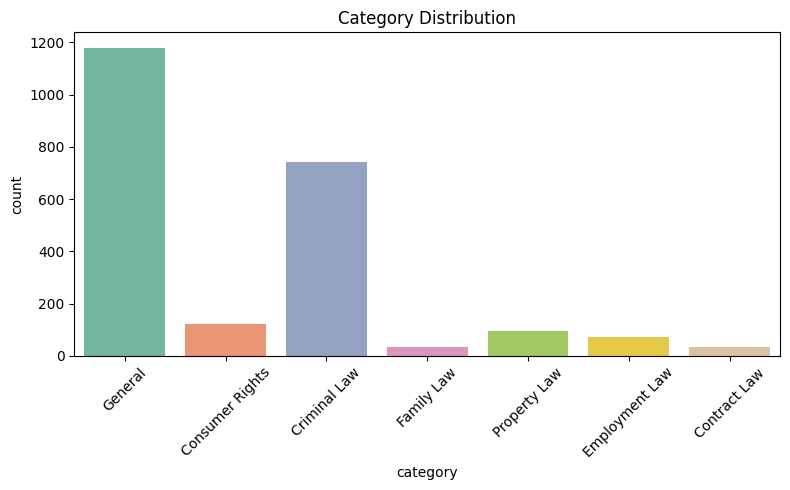

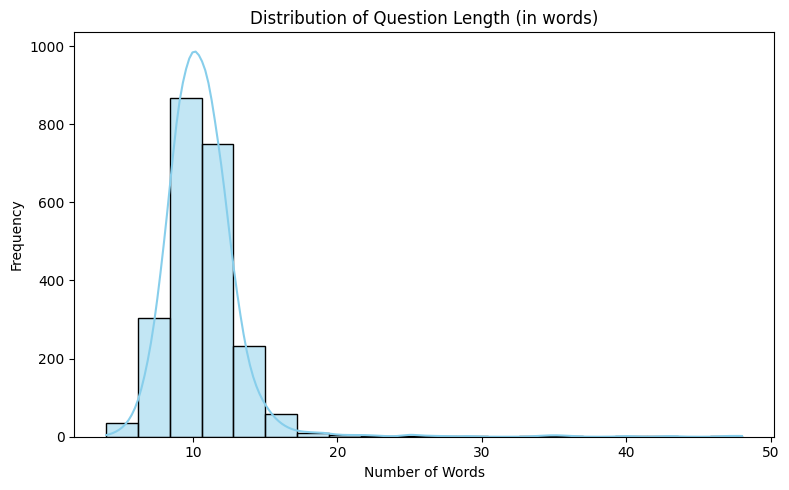

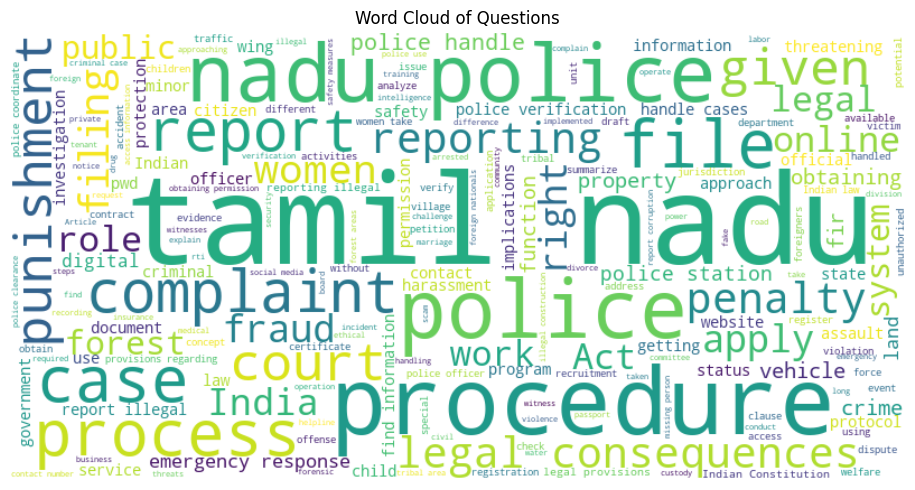

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- 1. Label Distribution Plot ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category', palette='Set2')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Text Length Distribution (Question) ---
df['question_length'] = df['Question'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['question_length'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Question Length (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 3. Word Cloud of Questions ---
question_text = " ".join(df['Question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(question_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Questions")
plt.tight_layout()
plt.show()

# Model Training

In [2]:
from sentence_transformers import SentenceTransformer, InputExample, losses, models
from torch.utils.data import DataLoader
import pandas as pd
import random

df = pd.read_csv("Final_QA_dataset.csv")

# Generate positive and negative pairs
examples = []
for idx, row in df.iterrows():
    q1 = row["Question"]
    
    # Positive pair (same question rephrased)
    positive = random.choice(df[df['category'] == row['category']]["Question"].tolist())
    examples.append(InputExample(texts=[q1, positive], label=1.0))
    
    # Negative pair (different category)
    negative = random.choice(df[df['category'] != row['category']]["Question"].tolist())
    examples.append(InputExample(texts=[q1, negative], label=0.0))

# Load a pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  

train_dataloader = DataLoader(examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

# Train the model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=10,
    warmup_steps=100,
    show_progress_bar=True
)

model.save("legal_nlp_model")

Step,Training Loss
500,0.117600
1000,0.021900
1500,0.009800
2000,0.006600
2500,0.005100


In [1]:
# Load your model
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer("legal_nlp_model")
df = pd.read_csv("Final_QA_dataset.csv")
corpus_embeddings = model.encode(df['Question'], convert_to_tensor=True)

def get_legal_answer(query):
    query_embedding = model.encode(query, convert_to_tensor=True)
    scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    best_idx = scores.argmax().item()
    return df.iloc[best_idx]['Question'], df.iloc[best_idx]['Answer']

c:\Users\yashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
c:\Users\yashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Performance Evaluation

In [3]:
#TF-IDF Vectorization + Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df['Question']
y = df['category']

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

Consumer Rights       1.00      0.62      0.77        24
   Contract Law       1.00      0.29      0.44         7
   Criminal Law       0.98      0.93      0.95       148
 Employment Law       0.50      0.14      0.22        14
     Family Law       0.00      0.00      0.00         7
        General       0.82      1.00      0.90       236
   Property Law       0.86      0.32      0.46        19

       accuracy                           0.87       455
      macro avg       0.74      0.47      0.54       455
   weighted avg       0.86      0.87      0.85       455



c:\Users\yashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
import pandas as pd
import random

df = pd.read_csv("Final_QA_dataset.csv")

# Basic variation function: change word order, replace with synonyms manually
def basic_perturbation(question):
    words = question.split()
    if len(words) > 4:
        # Shuffle middle words slightly
        middle = words[1:-1]
        random.shuffle(middle)
        return " ".join([words[0]] + middle + [words[-1]])
    else:
        return question  

sample_size = 100
sample_df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

# Create test queries with light perturbations
test_queries = sample_df['Question'].apply(basic_perturbation)
matched_questions = sample_df['Question']

test_df = pd.DataFrame({
    'test_query': test_queries,
    'matched_question': matched_questions
})

test_df.to_csv("test_queries.csv", index=False)

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# Load your test dataset (replace path if needed)
df = pd.read_csv("test_queries.csv")  
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Store similarity scores
similarity_scores = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    user_query = row['test_query']
    expected_question = row['matched_question']

    # Generate embeddings
    query_embedding = model.encode(user_query, convert_to_tensor=True)
    expected_embedding = model.encode(expected_question, convert_to_tensor=True)

    # Compute cosine similarity
    cosine_sim = util.pytorch_cos_sim(query_embedding, expected_embedding).item()
    similarity_scores.append(cosine_sim)

# Calculate average similarity
average_score = sum(similarity_scores) / len(similarity_scores)
print(f"\nAverage Cosine Similarity Score: {average_score:.4f}")

100%|██████████| 100/100 [00:03<00:00, 31.68it/s]


Average Cosine Similarity Score: 0.9457
